In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [71]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


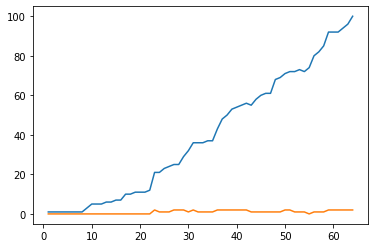

In [72]:
df1 = df[df['city']=='Ivinhema']
plt.plot(df1.day,df1.cases)
plt.plot(df1.day,df1.avg7_cases)
# plt.plot(df.day,df.deaths)

In [73]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
429673,2020-07-25,TO,Xambioá,city,535,8,70,False,11540,1722107,...,0.0,46.360,0.693,0.260,0.0,6,0,1.56,0.520,0.0
429674,2020-07-26,TO,Xambioá,city,543,8,71,False,11540,1722107,...,0.0,47.054,0.693,0.693,0.0,7,0,1.54,0.607,0.0
429675,2020-07-27,TO,Xambioá,city,545,8,72,False,11540,1722107,...,0.0,47.227,0.693,0.173,0.0,7,0,1.52,0.631,0.0
429676,2020-07-28,TO,Xambioá,city,549,8,73,False,11540,1722107,...,0.0,47.574,0.693,0.347,0.0,6,0,1.50,0.594,0.0
429677,2020-07-29,TO,Xambioá,city,552,8,74,True,11540,1722107,...,0.0,47.834,0.693,0.260,0.0,5,0,1.48,0.470,0.0


In [74]:
# df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
# df['date'] = df['date'].astype('datetime64[ns]')


In [79]:
df2 = df[(df['state']=='SP')]# and (df['place_type']=='state')]
df2 = df2[(df2['place_type']=='state')]
local = 'SP'
df2

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
364831,2020-02-25,SP,-,state,1,0,1,False,45919049,35,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
364832,2020-02-26,SP,-,state,1,0,2,False,45919049,35,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
364833,2020-02-27,SP,-,state,1,0,3,False,45919049,35,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
364834,2020-02-28,SP,-,state,2,0,4,False,45919049,35,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
364835,2020-02-29,SP,-,state,2,0,5,False,45919049,35,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364981,2020-07-26,SP,-,state,483982,21606,151,False,45919049,35,...,-222.0,10.540,0.471,0.098,0.002,9847,267,4.62,0.214,0.006
364982,2020-07-27,SP,-,state,487654,21676,152,False,45919049,35,...,-19.0,10.620,0.472,0.080,0.002,10174,269,4.58,0.222,0.006
364983,2020-07-28,SP,-,state,500301,22059,153,False,45919049,35,...,313.0,10.895,0.480,0.275,0.008,11090,269,4.52,0.242,0.006
364984,2020-07-29,SP,-,state,514197,22389,154,False,45919049,35,...,-53.0,11.198,0.488,0.303,0.007,10678,265,4.48,0.233,0.006


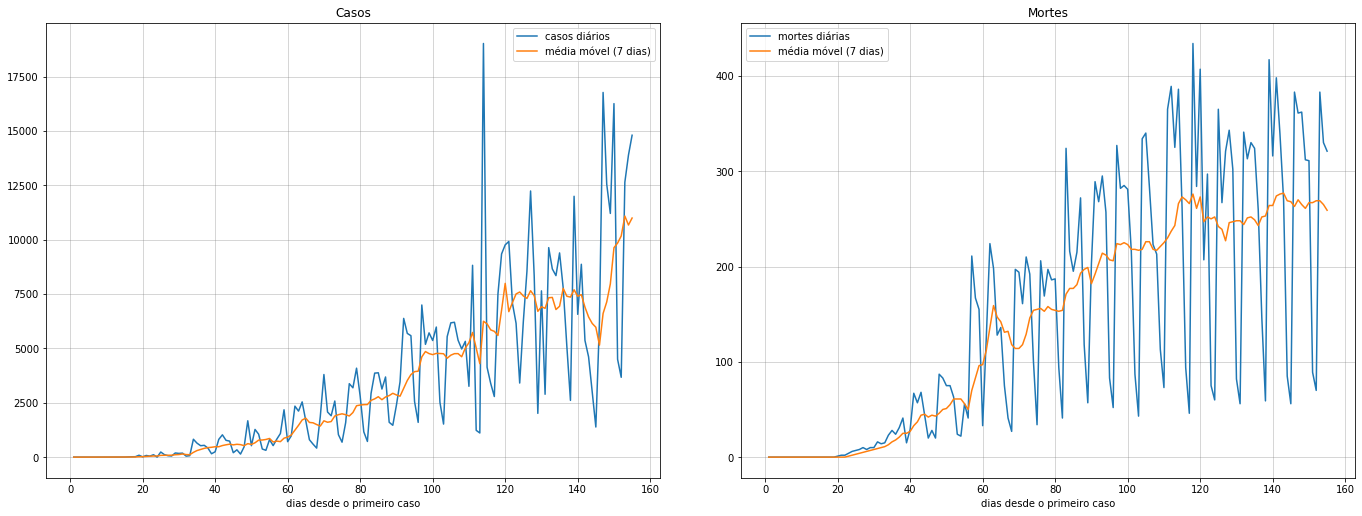

In [78]:
fig, ((ax3, ax4)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)


ax3.set_title("Casos")
ax3.set_xlabel("dias desde o primeiro caso")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df2.day, df2.case_day, label = 'casos diários')
ax3.plot(df2.day, df2.avg7_cases, label = 'média móvel (7 dias)')

ax4.set_title("Mortes")
ax4.set_xlabel("dias desde o primeiro caso")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df2.day, df2.death_day, label = 'mortes diárias')
ax4.plot(df2.day, df2.avg7_deaths, label = 'média móvel (7 dias)')

ax3.legend()
ax4.legend()


In [9]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
ax3.set_title("Cases in Brazil")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.case_day, label = 'daily cases')
ax3.plot(df_br.day, df_br.avg7_cases, label = 'moving average')

ax4.set_title("Deaths in Brazil")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br.death_day, label = 'daily deaths')
ax4.plot(df_br.day, df_br.avg7_deaths, label = 'moving average')


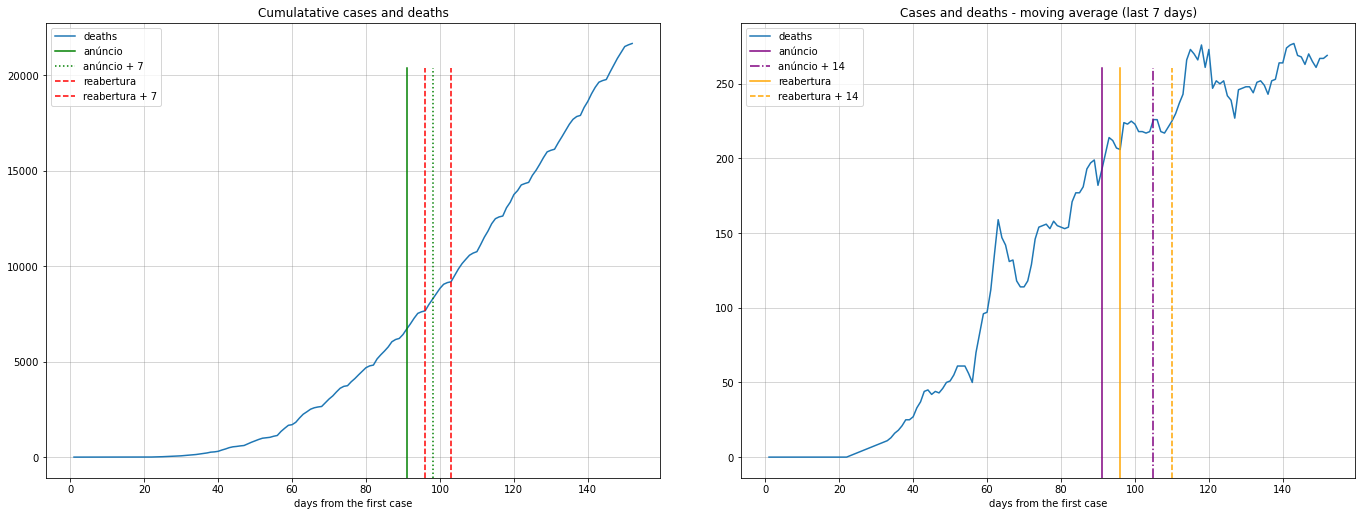

In [11]:

# Selected cities
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases and deaths")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases and deaths - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

dados = df[(df['state'] == 'SP') & (df['place_type']=='state')]

ax1.plot(dados.day, dados.cases, label = 'cases')
ax1.plot(dados.day, dados.deaths, label = 'deaths')
ax2.plot(dados.day, dados.avg7_cases, label = 'cases')
ax2.plot(dados.day, dados.avg7_deaths, label = 'deaths')

ax1.axvline(x=91, ymin=0, ymax=0.9, color = 'green', linestyle = '-',label = 'anúncio')
ax1.axvline(x=91+7, ymin=0, ymax=0.9, color = 'green', linestyle = ':',label = 'anúncio + 7')
ax1.axvline(x=96, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura')
ax1.axvline(x=96+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura + 7')

ax2.axvline(x=91, ymin=0, ymax=0.9, color = 'purple', linestyle = '-',label = 'anúncio')
ax2.axvline(x=91+14, ymin=0, ymax=0.9, color = 'purple', linestyle = '-.',label = 'anúncio + 14')
ax2.axvline(x=96, ymin=0, ymax=0.9, color = 'orange', linestyle = '-',label = 'reabertura')
ax2.axvline(x=96+14, ymin=0, ymax=0.9, color = 'orange', linestyle = '--',label = 'reabertura + 14')

ax1.legend()
ax2.legend()
# fig.savefig('../analysis/saoPaulo_cases_deaths.png')